## Summary

This is a notebook containing main functions / approaches neccessary to do pre-processing on the Kings County housing data set.

In [16]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [17]:
# Sklearn imports

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

In [18]:
# Statsmodel imports

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
df = pd.read_csv('./data/kc_house_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/kc_house_data.csv'

# Train test split

In [14]:
# Train test split
y = df['price']
X = df.drop('price', axis=1)

# Split the data out, specifying size of the split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.33,
                                                    random_state=5
)

# Merge back together into one Train and Test dataset
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


NameError: name 'df' is not defined

# Linear Regression Rules

In [15]:
df_train.columns

NameError: name 'df_train' is not defined

In [5]:
# Check for linear relationships
# Maybe filter this for only the columns we're truly interested in

sns.pairplot(df_train)
plt.show()

NameError: name 'df_train' is not defined

## Multicollinearity

NameError: name 'X_train' is not defined

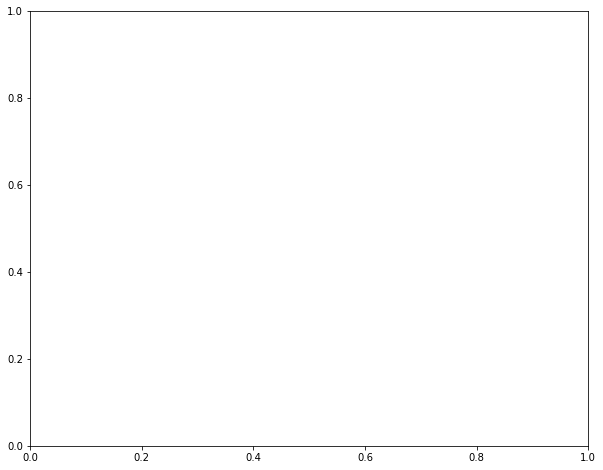

In [6]:
# Check for multi collinearity among independent variables
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_train.drop('id', axis=1).corr(), annot=True, ax=ax);

In [7]:
# Filter for only multicollinearity above a certain threshold

test=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
test['pairs'] = list(zip(test.level_0, test.level_1))

# set index to pairs
test.set_index(['pairs'], inplace = True)

#d rop level columns
test.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
test.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
test.drop_duplicates(inplace=True)

test[(test.cc>.6)] #& (test.cc <1)]

NameError: name 'X_train' is not defined

In [8]:
# Can also check for multicollinearity using statsmodel
# Need to first filter for numerical variables

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# # For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# # label the scores with their related columns
vif["features"] = X_train.columns

vif

NameError: name 'X_train' is not defined

## Simple model: what is most correlated with Price

In [9]:
df_train.corr().price.sort_values(ascending=False)

NameError: name 'df_train' is not defined

## Check residuals for normality and heteroskedacity

In [ ]:
# Calculate residuals for each model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

In [ ]:
# Histogram of residuals
plt.hist(train_residuals, label='Train')
plt.hist(test_residuals, label='Test')

plt.show()

In [ ]:
# QQ plots are generally great tools for checking for normality.
import statsmodels.api as sm

sm.qqplot(train_residuals, line = 'r');

In [ ]:
# Check heteroskedacity of full model
plt.scatter(train_preds, train_residuals, label='Train')
plt.scatter(test_preds, test_residuals, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

In [ ]:
# For simple model

# note that these residplots only work for single variables
sns.residplot(x=X_train['TV'], y=y_train)
plt.show()

## Data cleaning

## Log transformation

In [ ]:
# Replace data_pred with our actual dataframe

data_log = pd.DataFrame([])
data_log['logdisp'] = np.log(data_pred['displacement'])
data_log['loghorse'] = np.log(data_pred['horsepower'])
data_log['logweight'] = np.log(data_pred['weight'])
data_log.hist(figsize  = [6, 6]);

## Standardize columns

Feature selection and engineering lecture

In [ ]:
# From SK learn documentation

from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)
[0.5 0.5]
print(scaler.transform(data))
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
print(scaler.transform([[2, 2]]))

In [ ]:
# Standardization example from a lab

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
ss = StandardScaler()
ss.fit(wine.drop('quality', axis=1))

wine_scaled = ss.transform(wine.drop('quality', axis=1))

## Categorical variables

In [ ]:
# Binary variables
import OrdinalEncoder from sklearn.preprocessing

from sklearn.preprocessing import OrdinalEncoder

# Replace None with appropriate code


# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
street_train = X_train[['Street']]

# (2) Instantiate an OrdinalEncoder
encoder_street = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_street.fit(street_train)

# Inspect the categories of the fitted encoder
encoder_street.categories_[0]

# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
street_encoded_train = encoder_street.transform(street_train)

# Flatten for appropriate shape
street_encoded_train = street_encoded_train.flatten()

# Visually inspect street_encoded_train
street_encoded_train


# (5) Replace value of Street
X_train["Street"] = street_encoded_train

# Visually inspect X_train
X_train

In [ ]:
# Multiple categories 


import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable fireplace_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
fireplace_qu_train = X_train[["FireplaceQu"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# # (3) Fit the encoder on fireplace_qu_train
ohe.fit(fireplace_qu_train)

# # Inspect the categories of the fitted encoder
ohe.categories_


# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# Visually inspect fireplace_qu_encoded_train
fireplace_qu_encoded_train

# Run this cell without changes

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
fireplace_qu_encoded_train

# (5b) Drop original FireplaceQu column
X_train.drop("FireplaceQu", axis=1, inplace=True)

# Visually inspect X_train
X_train

# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_train
X_train

## Missing / null values

In [ ]:
# Identify missing / null variables

from sklearn.impute import MissingIndicator

# (1) Identify data to be transformed
# We only want missing indicators for LotFrontage
frontage_train = X_train[["LotFrontage"]]

# (2) Instantiate the transformer object
missing_indicator = MissingIndicator()

# (3) Fit the transformer object on frontage_train
missing_indicator.fit(frontage_train)

# (4) Transform frontage_train and assign the result
# to frontage_missing_train
frontage_missing_train = missing_indicator.transform(frontage_train)

# # Visually inspect frontage_missing_train
frontage_missing_train

In [ ]:
# Replacing missing / null values

from sklearn.impute import SimpleImputer

# (1) frontage_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer = SimpleImputer(strategy='median')

# (3) Fit the imputer on frontage_train
imputer.fit(frontage_train)

# # (4) Transform frontage_train using the imputer and
# # assign the result to frontage_imputed_train
frontage_imputed_train = imputer.transform(frontage_train)

# # Visually inspect frontage_imputed_train
frontage_imputed_train

## Feature selection

In [ ]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [ ]:
ss = StandardScaler()
ss.fit(wine.drop('quality', axis=1))

wine_scaled = ss.transform(wine.drop('quality', axis=1))

In [ ]:
select.fit(X=wine_scaled, y=wine['quality'])

In [ ]:
select.support_

In [ ]:
select.ranking_